<a href="https://colab.research.google.com/github/rushabh-v/Autoencoder/blob/master/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras import backend as K
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.reshape(-1, 28,28, 1)/255
x_test = x_test.reshape(-1, 28,28, 1)/255

In [4]:
X,X_val,Y,Y_val = train_test_split(x_train,x_train,test_size=0.1)

In [5]:
input_img = Input(shape = (28, 28, 1))

In [6]:
def Autoencoder(input_img):
    #Encoder
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(8, (1, 1), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(2, (1, 1), activation='relu', padding='same')(x)
    x = Conv2D(1, (1, 1), activation='relu', padding='same')(x)
    #Decoder
    x = Conv2D(2, (1, 1), activation='relu', padding='same')(x)
    x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(1, (3, 3), activation='tanh', padding='same')(x)
    return x

In [8]:
autoencoder_train = Model(input_img, Autoencoder(input_img))
autoencoder_train.compile(loss='mean_squared_error', optimizer = Adam())

In [9]:
autoencoder_train.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 256)       2560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       295040    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        73792     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 16)        4624  

In [10]:
model_saver = tf.keras.callbacks.ModelCheckpoint("model_weights.h5", 
                                                 monitor='val_loss', verbose=1, 
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='auto')

In [11]:
history = autoencoder_train.fit(X,Y,epochs = 20,validation_data = (X_val,Y_val),callbacks = [model_saver])

Epoch 1/20
1688/1688 [==============================] - ETA: 0s - loss: 0.0084
Epoch 00001: val_loss improved from inf to 0.00384, saving model to model_weights.h5
1688/1688 [==============================] - 54s 32ms/step - loss: 0.0084 - val_loss: 0.0038
Epoch 2/20
1687/1688 [============================>.] - ETA: 0s - loss: 0.0035
Epoch 00002: val_loss improved from 0.00384 to 0.00308, saving model to model_weights.h5
1688/1688 [==============================] - 54s 32ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 3/20
1687/1688 [============================>.] - ETA: 0s - loss: 0.0029
Epoch 00003: val_loss improved from 0.00308 to 0.00276, saving model to model_weights.h5
1688/1688 [==============================] - 54s 32ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 4/20
1687/1688 [============================>.] - ETA: 0s - loss: 0.0026
Epoch 00004: val_loss improved from 0.00276 to 0.00264, saving model to model_weights.h5
1688/1688 [==============================] - 54s 32ms

In [12]:
encoder = Model(input_img,autoencoder_train.layers[11].output)

In [13]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 256)       2560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       295040    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        73792     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 16)        4624

In [20]:
idx = 12
input_shape = autoencoder_train.layers[idx].get_input_shape_at(0)[1:]
layer_input = Input(shape=input_shape)

x = layer_input
for layer in autoencoder_train.layers[idx:]:
    x = layer(x)


decoder = Model(layer_input, x)

In [21]:
decoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 7, 7, 1)]         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 2)           4         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 4)           76        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 8)           296       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 32)        4640

In [22]:
code = encoder.predict(x_test)

In [23]:
code.shape

(10000, 7, 7, 1)

In [24]:
extract = decoder.predict(code)

In [25]:
extract.shape

(10000, 28, 28, 1)

#Plotting original and extracted images

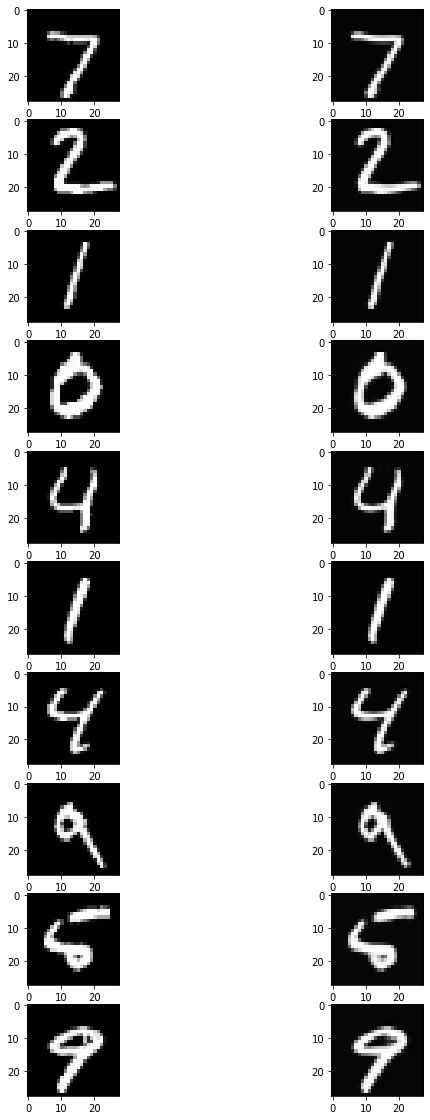

In [26]:
w=10
h=10
fig=plt.figure(figsize=(10, 20))
columns = 2
rows = 10
j = 0
k = 0
for i in range(1, columns*rows +1):
    if i%2 == 0:
        img = extract[j,...,0]
        j+=1
    else:
        img = x_test[k,...,0]
        k+=1
    fig.add_subplot(rows, columns, i)
    plt.imshow(img,cmap = 'gray')
plt.show()